In [1]:
from dolfinx import fem, mesh, plot, geometry
from mpi4py import MPI
from petsc4py.PETSc import ScalarType
from ufl import TrialFunction, Measure, TestFunction, dx, ds, grad, inner, lhs, rhs, div, Cell, Mesh, VectorElement
from matplotlib import pyplot as plt, cm
import numpy as np
import pyvista

In [2]:
nx, ny = 50, 50
x1, y1 = 0.0, 0.0
x2, y2 = 0.1, 0.1
freq = 10000
omega = freq * 2 * np.pi
pressure = (1.0, 0.0)

ro, c, eta = 1000, 1500, 0.000894

In [3]:
def get_boundaries():
    return ((1, lambda x: np.isclose(x[0], x1)),
            (2, lambda x: np.isclose(x[0], x2)),
            (3, lambda x: np.isclose(x[1], y1)),
            (4, lambda x: np.isclose(x[1], y2)))

In [4]:
def pyvista_plot(domain, values, title, show_edges=False):
    pyvista.start_xvfb()
    plotter = pyvista.Plotter(window_size=[800, 800])
    grid = pyvista.UnstructuredGrid(*plot.create_vtk_mesh(domain, domain.topology.dim))
    grid.cell_data[title] = values
    grid.set_active_scalars(title)
    plotter.add_mesh(grid, show_edges=show_edges)
    plotter.view_xy()
    plotter.show()

In [5]:
def get_values(fun, x):
    domain = fun.function_space.mesh
    bb_tree = geometry.BoundingBoxTree(domain, domain.topology.dim)

    cells = []
    points_on_proc = []
    
    cell_candidates = geometry.compute_collisions(bb_tree, x)
    
    colliding_cells = geometry.compute_colliding_cells(domain, cell_candidates, x)
    for i, point in enumerate(x):
        if len(colliding_cells.links(i)) > 0:
            points_on_proc.append(point)
            cells.append(colliding_cells.links(i)[0])

    points_on_proc = np.array(points_on_proc, dtype=np.float64)

    return fun.eval(points_on_proc, cells)

In [6]:
def matplotlib_plot(fun, projection, titles, cmap=cm.viridis, levels=100):
    x = np.linspace(x1, x2, nx)
    y = np.linspace(y1, y2, ny)

    xx, yy = np.meshgrid(x, y)
    lin_shape = xx.shape[0] * xx.shape[1]

    compute_points = np.hstack((xx.ravel(), yy.ravel(), np.zeros(lin_shape))).reshape((3, lin_shape)).T
    values = [np.real(get_values(fun, compute_points)),
              np.imag(get_values(fun, compute_points))]

    if fun.function_space.num_sub_spaces == 0:
        zz = [vals[:, 0].reshape(xx.shape) for vals in values]
    else:
        zz = [np.linalg.norm(vals, axis=1).reshape(xx.shape) for vals in values]

    fig = plt.figure(constrained_layout=True, figsize=(14, 6))
    layout = ['1', '2']
    
    if projection == '3d':
        axd = fig.subplot_mosaic([layout], empty_sentinel='', subplot_kw={'projection': '3d'})
    else:
        axd = fig.subplot_mosaic([layout], empty_sentinel='')
    
    for i, ax_id in enumerate(layout):
        if projection == '3d':
            surf = axd[ax_id].plot_surface(xx, yy, zz[i], cmap=cmap)
            fig.colorbar(surf, ax=axd[ax_id], shrink=0.75)
        elif projection == '2d':
            surf = axd[ax_id].contourf(xx, yy, zz[i], levels, cmap=cmap)
            fig.colorbar(surf, ax=axd[ax_id])

        axd[ax_id].set_title(titles[i], fontsize=16)
        axd[ax_id].set_xlabel('x', fontsize=16)
        axd[ax_id].set_ylabel('y', fontsize=16)
        
    plt.show()

  vm.x.array.real = np.full_like(vm.x.array.real, 0.5, dtype=ScalarType)



Iteration 1
{0.5}



Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(



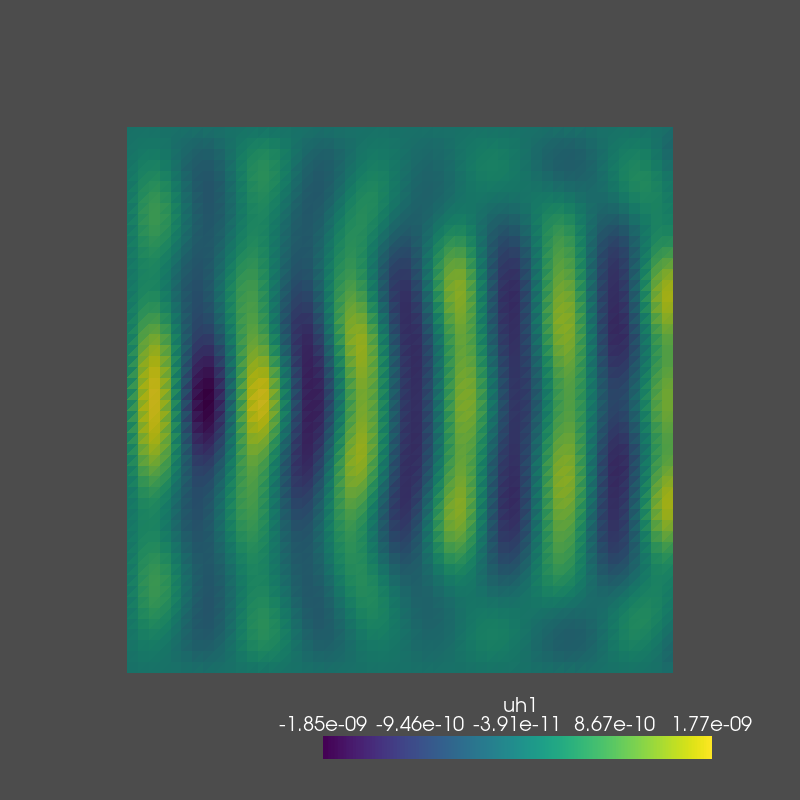

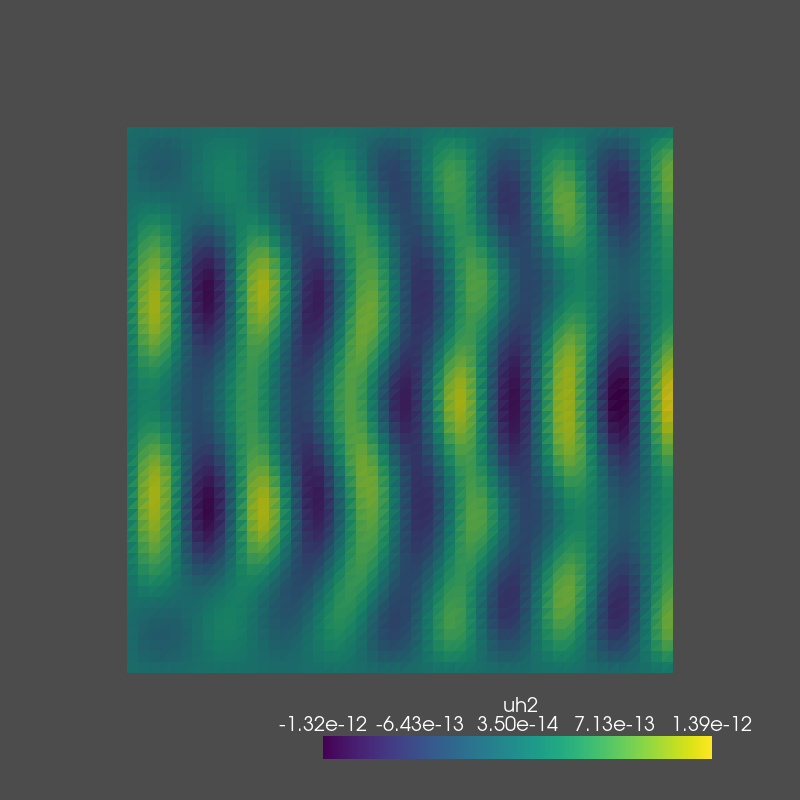

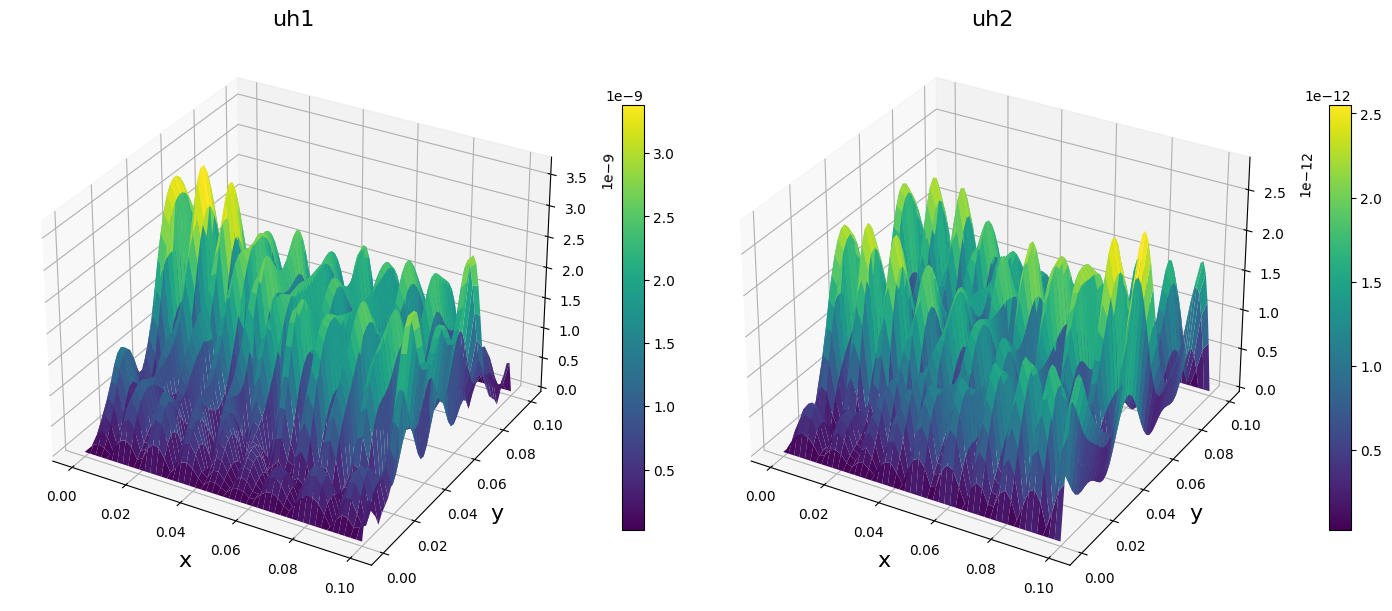

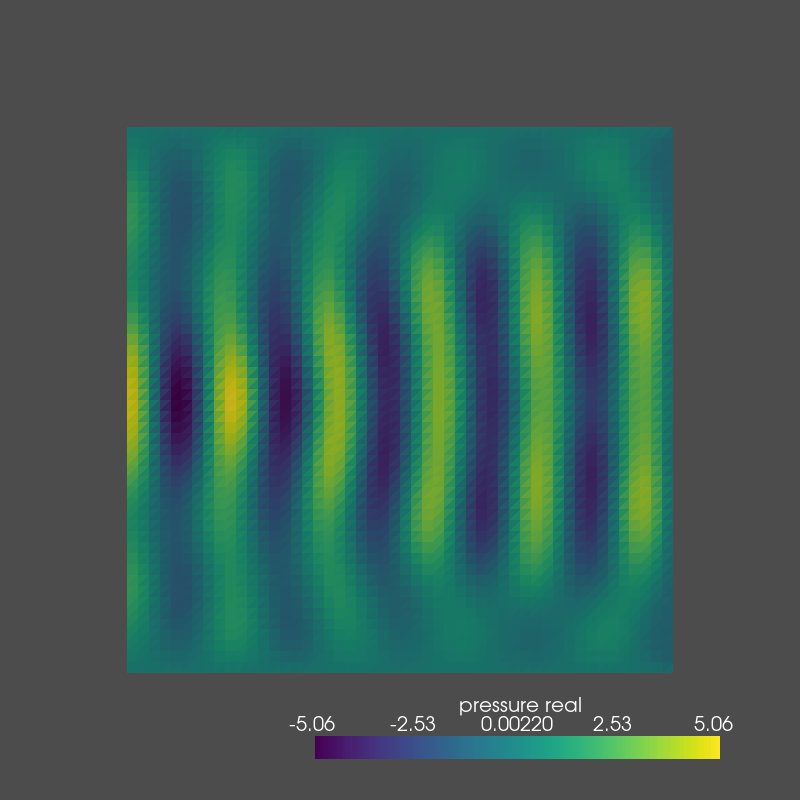

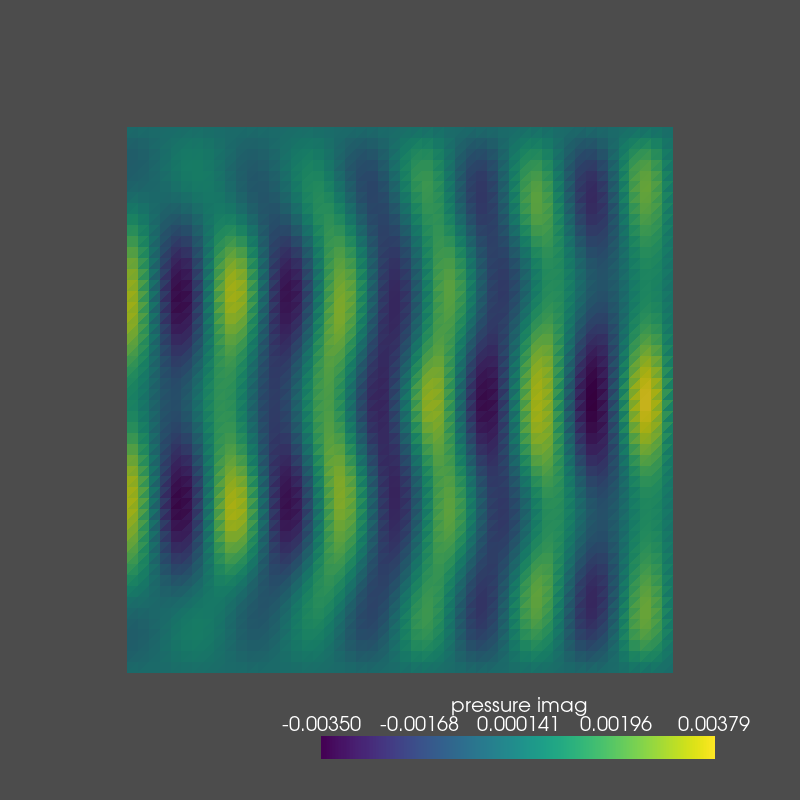

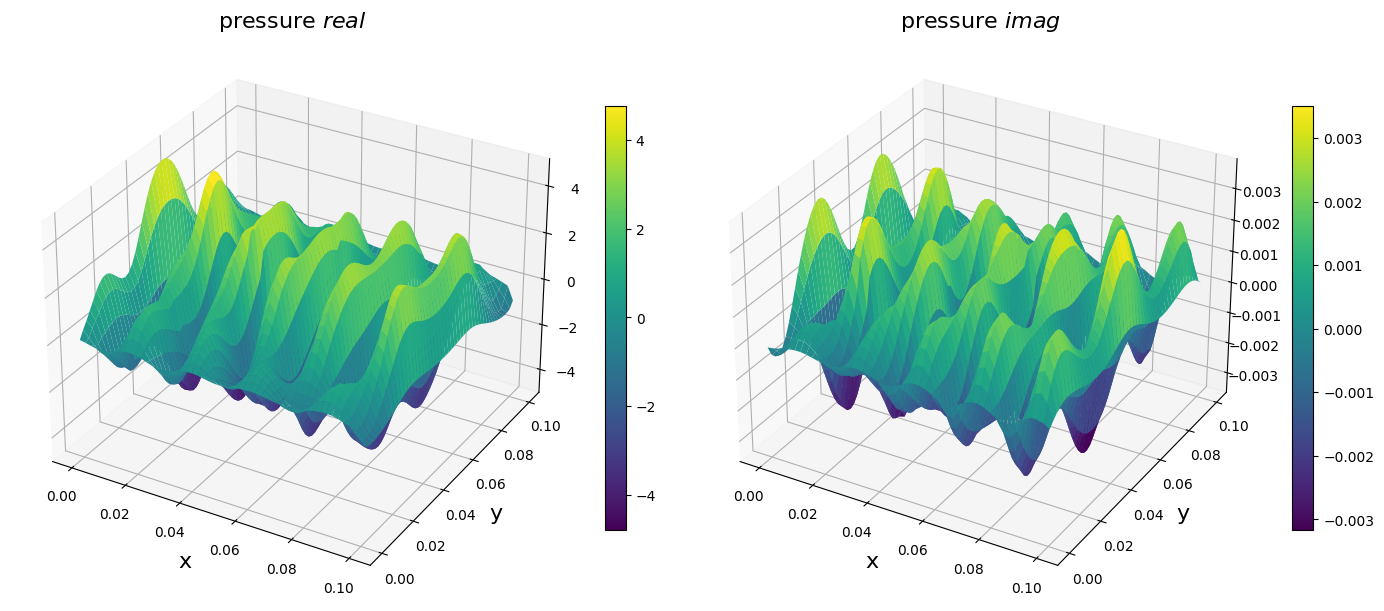

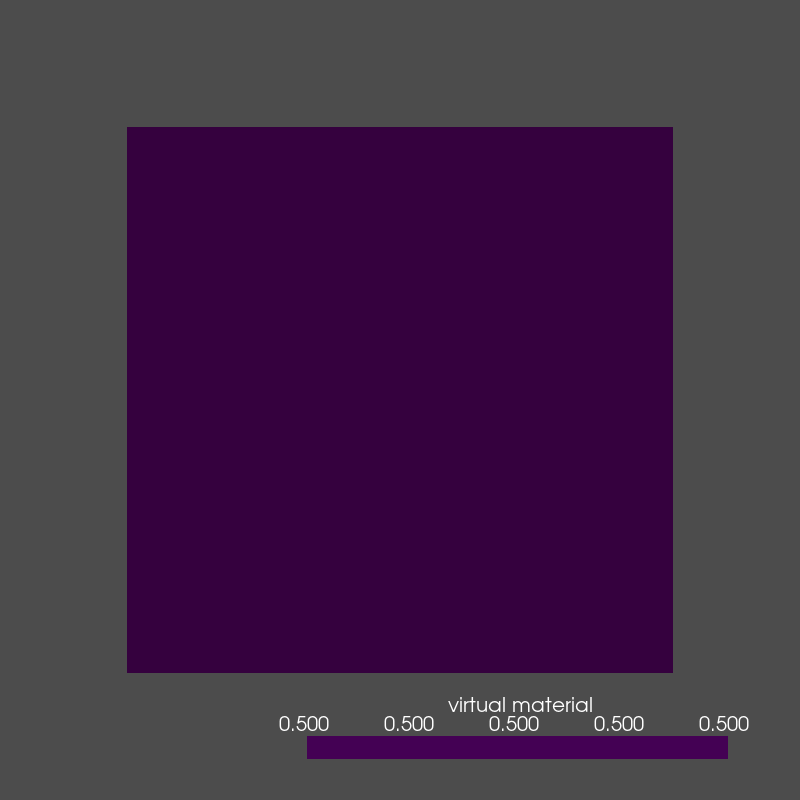

Iteration 2
{0.6, 0.4}
Iteration 3
{0.5, 0.7, 0.3}
Iteration 4
{0.4, 0.6, 0.8, 0.2}
Iteration 5
{0.5, 0.7, 0.1, 0.3, 0.9}
Iteration 6
{0.4, 0.6, 0.8, 0.2, 0.0}
Iteration 7
{0.5, 0.7, 0.3, 0.0, 0.9, 0.1}
Iteration 8
{0.6, 0.8, 0.0, 1.0, 0.4, 0.2}
Iteration 9
{0.5, 0.7, 0.3, 1.0, 0.0, 0.1, 0.9}
Iteration 10
{0.6, 0.8, 0.2, 1.0, 0.4, 0.0}
Iteration 11
{0.7, 0.9, 0.3, 1.0, 0.5, 0.1, 0.0}
Iteration 12
{0.6, 0.8, 0.2, 1.0, 0.4, 0.0}
Iteration 13
{0.7, 0.9, 0.3, 1.0, 0.5, 0.1, 0.0}
Iteration 14
{0.8, 1.0, 0.6, 0.2, 0.4, 0.0}
Iteration 15
{0.9, 1.0, 0.3, 0.5, 0.7, 0.1, 0.0}
Iteration 16
{0.8, 1.0, 0.6, 0.2, 0.4, 0.0}
Iteration 17
{0.7, 1.0, 0.1, 0.3, 0.5, 0.9, 0.0}
Iteration 18
{0.6, 1.0, 0.8, 0.0, 0.4, 0.2}
Iteration 19
{0.5, 1.0, 0.3, 0.0, 0.7, 0.1, 0.9}
Iteration 20
{0.6, 1.0, 0.8, 0.0, 0.4, 0.2}
Iteration 21
{0.7, 1.0, 0.9, 0.0, 0.5, 0.3, 0.1}
Iteration 22
{0.8, 1.0, 0.6, 0.0, 0.4, 0.2}
Iteration 23
{0.9, 1.0, 0.7, 0.0, 0.5, 0.3}
Iteration 24
{0.0, 1.0, 0.6, 0.8, 0.4, 0.2}
Iteration 25
{0.

KeyboardInterrupt: 

In [7]:
domain = mesh.create_rectangle(MPI.COMM_WORLD, [(x1, y1), (x2, y2)], [nx, ny])
V = fem.VectorFunctionSpace(domain, ('CG', 2))
Q = fem.FunctionSpace(domain, ('DG', 0))

u = TrialFunction(V)
v = TestFunction(V)

vm = fem.Function(Q)
vm.x.array.real = np.full_like(vm.x.array.real, 0.5, dtype=ScalarType)

boundaries = get_boundaries()
    
facet_indices, facet_markers = [], []
fdim = domain.topology.dim - 1
for (marker, locator) in boundaries:
    facets = mesh.locate_entities(domain, fdim, locator)
    facet_indices.append(facets)
    facet_markers.append(np.full_like(facets, marker))
facet_indices = np.hstack(facet_indices).astype(np.int32)
facet_markers = np.hstack(facet_markers).astype(np.int32)
sorted_facets = np.argsort(facet_indices)
facet_tag = mesh.meshtags(domain, fdim, facet_indices[sorted_facets], facet_markers[sorted_facets])

ds = Measure('ds', domain=domain, subdomain_data=facet_tag)

step = 0.1
pw = 3
count = 1
vm_has_only_zeros_or_ones = False
while not vm_has_only_zeros_or_ones:
    print(f'Iteration {count}')
    if count > 1:
        pmin = np.min(p.x.array.real)
        pmax = np.max(p.x.array.real)
        pmid = (pmin + pmax) / 2
        for i, el in enumerate(p.x.array.real):
            prev = vm.x.array.real[i]
            if el <= pmid and not np.isclose(prev, 0.0):
                vm.x.array.real[i] = min(1.0, round(prev + step, 1))
            elif el > pmid and not np.isclose(prev, 1.0):
                vm.x.array.real[i] = max(0.0, round(prev - step, 1))
    print(set(vm.x.array.real))
    
    aa = (ro * vm ** pw) * (c * (1 - vm) ** pw) ** 2 * inner(grad(u), grad(v)) * dx
    mm = (ro * vm ** pw) * inner(u, v) * dx
    cc = 4/3 * eta * inner(grad(u), grad(v)) * dx

    u_N = fem.Constant(domain, ScalarType(pressure))
    F = aa - omega ** 2 * mm + omega * 1.0j * cc + inner(u_N, v) * ds(2)

    bcs = []
    for marker in (1, 3, 4):
        u_D = fem.Function(V)
        u_D.interpolate(lambda x: (x[0] * 0.0, x[1] * 0.0))
        facets = facet_tag.find(marker)            
        dofs = fem.locate_dofs_topological(V, fdim, facets)
        bcs.append(fem.dirichletbc(u_D, dofs))
    
    Left = lhs(F)
    Right = rhs(F)

    problem = fem.petsc.LinearProblem(Left, Right, bcs, petsc_options={'ksp_type': 'preonly', 'pc_type': 'lu'})
    uh = problem.solve()
    
    p = fem.Function(Q)
    p.interpolate(fem.Expression((ro * vm ** pw) * (c * (1 - vm) ** pw) ** 2 * div(uh), Q.element.interpolation_points()))
            
    vm_has_only_zeros_or_ones = np.all([np.isclose(el, 0.0) or np.isclose(el, 1.0) for el in vm.x.array.real])
    
    if count == 1 or vm_has_only_zeros_or_ones:        
        uh1, uh2 = uh.split()
        mod_uh = fem.Function(Q)
        mod_uh.interpolate(fem.Expression((uh1 + uh2) / 2, Q.element.interpolation_points()))
        pyvista_plot(domain, mod_uh.x.array.real, 'uh1')
        pyvista_plot(domain, mod_uh.x.array.imag, 'uh2')
        matplotlib_plot(uh, '3d', ['uh1', 'uh2'])
        pyvista_plot(domain, p.x.array.real, 'pressure real')
        pyvista_plot(domain, p.x.array.imag, 'pressure imag')
        matplotlib_plot(p, '3d', [r'pressure $real$', r'pressure $imag$'])
        pyvista_plot(domain, vm.x.array.real, 'virtual material')
    count += 1

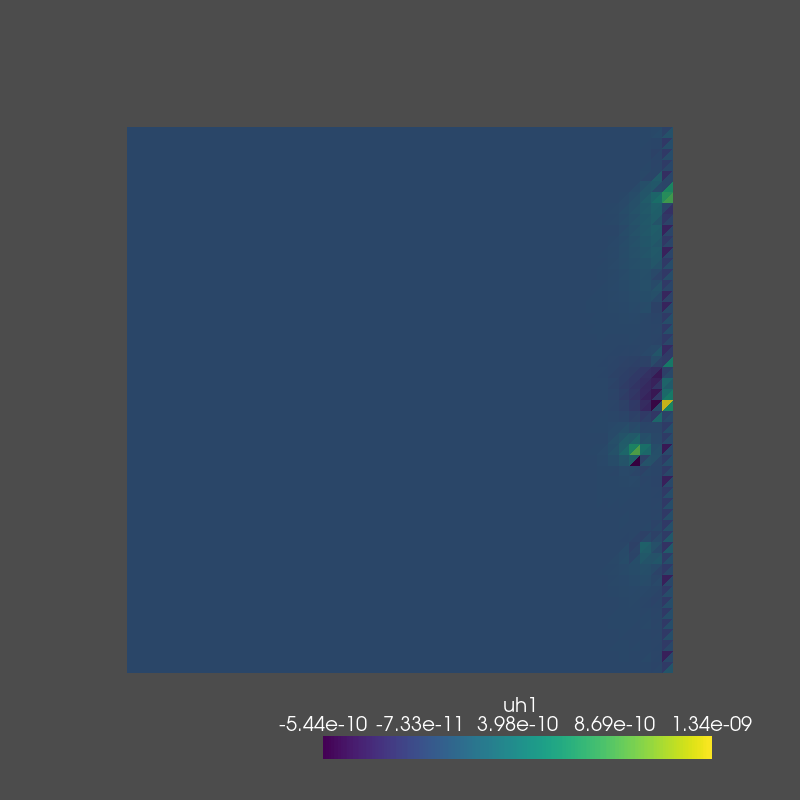

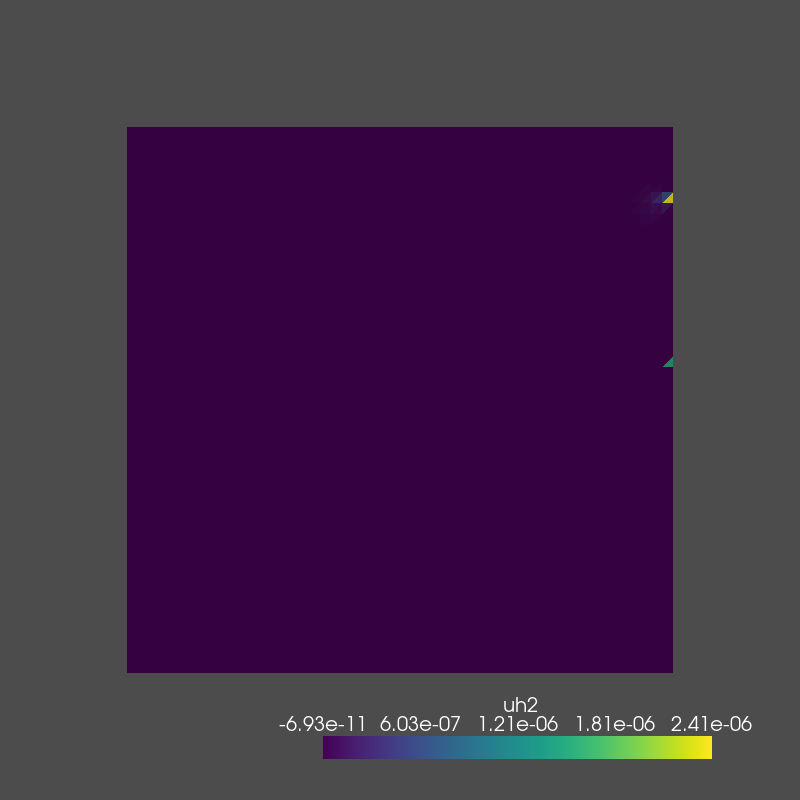

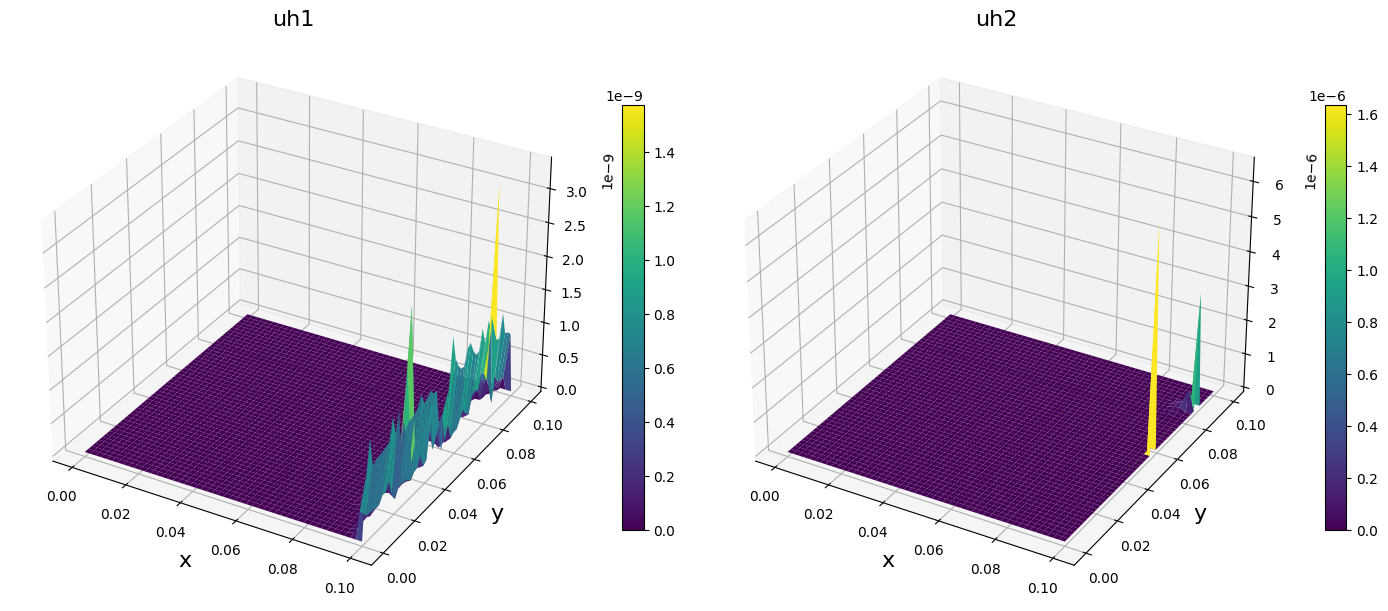

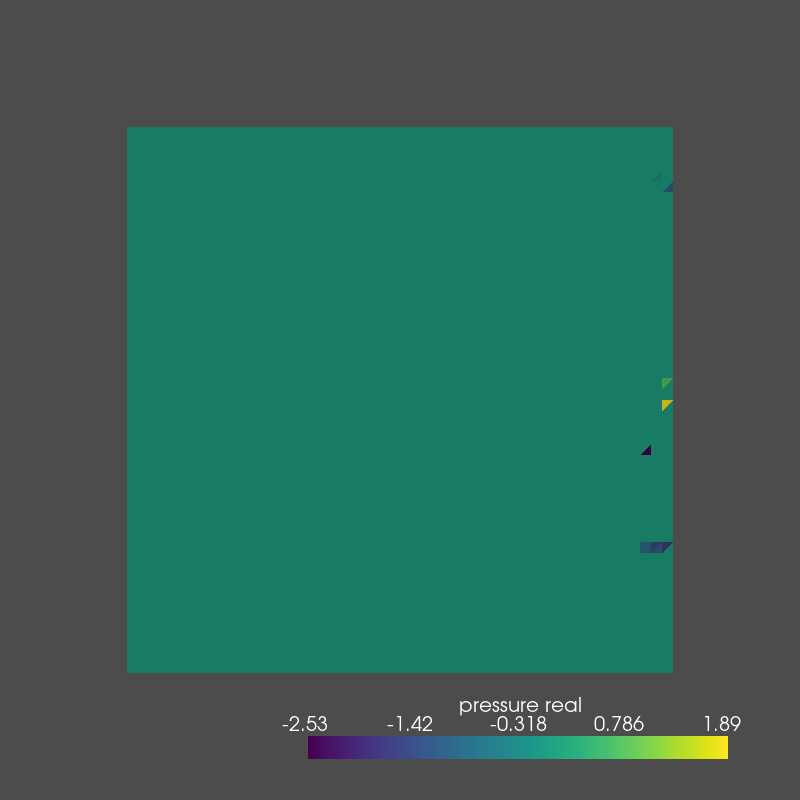

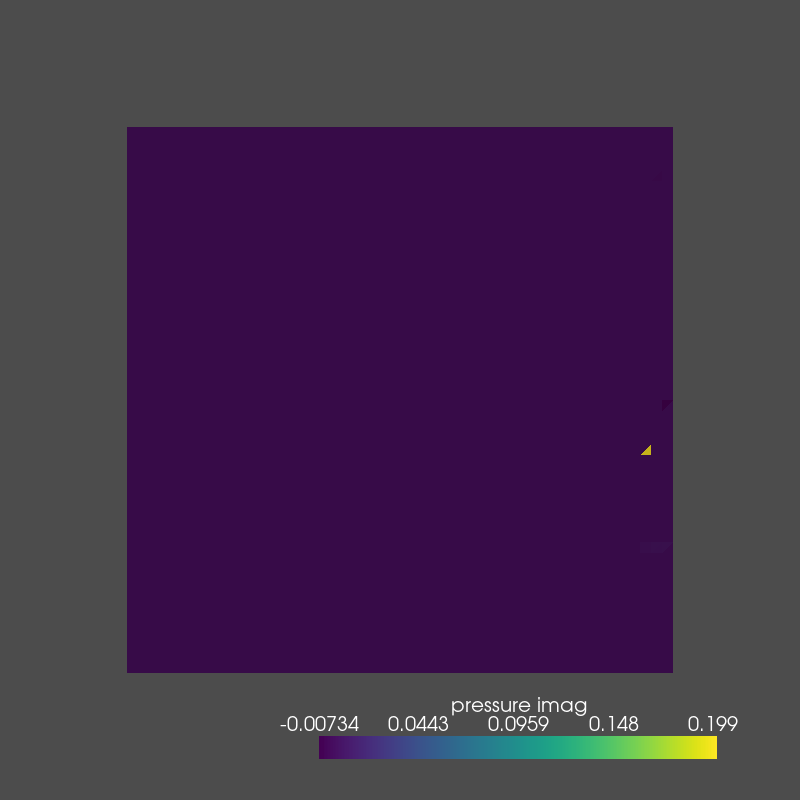

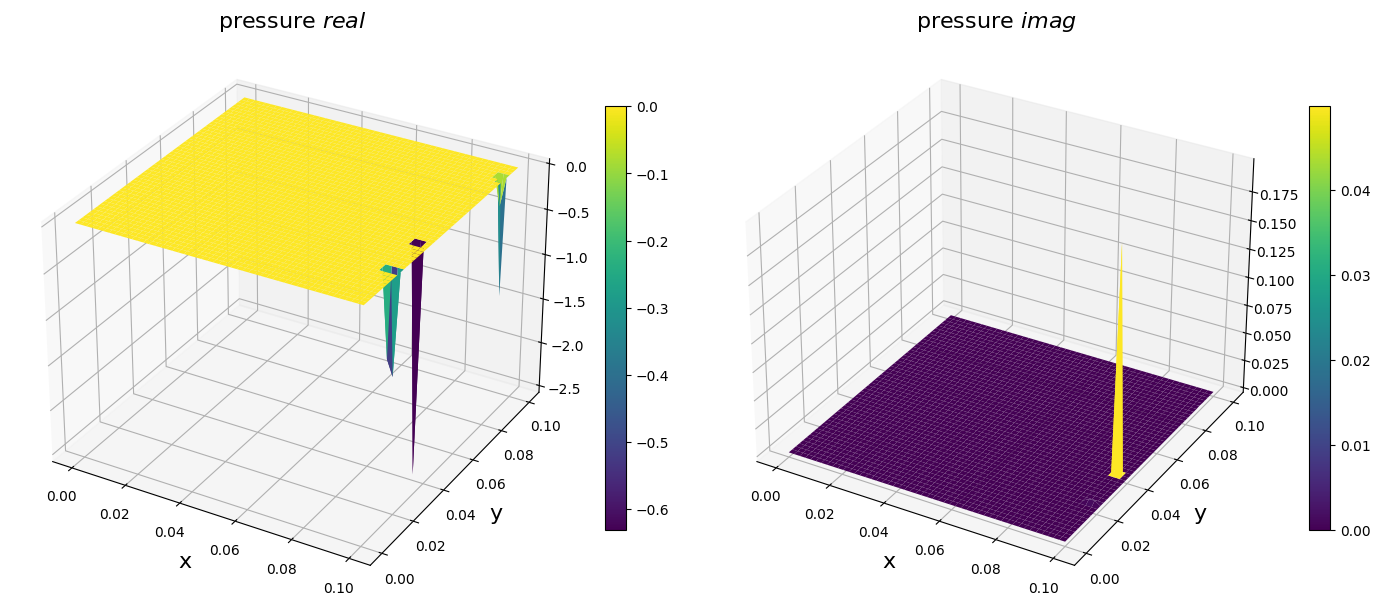

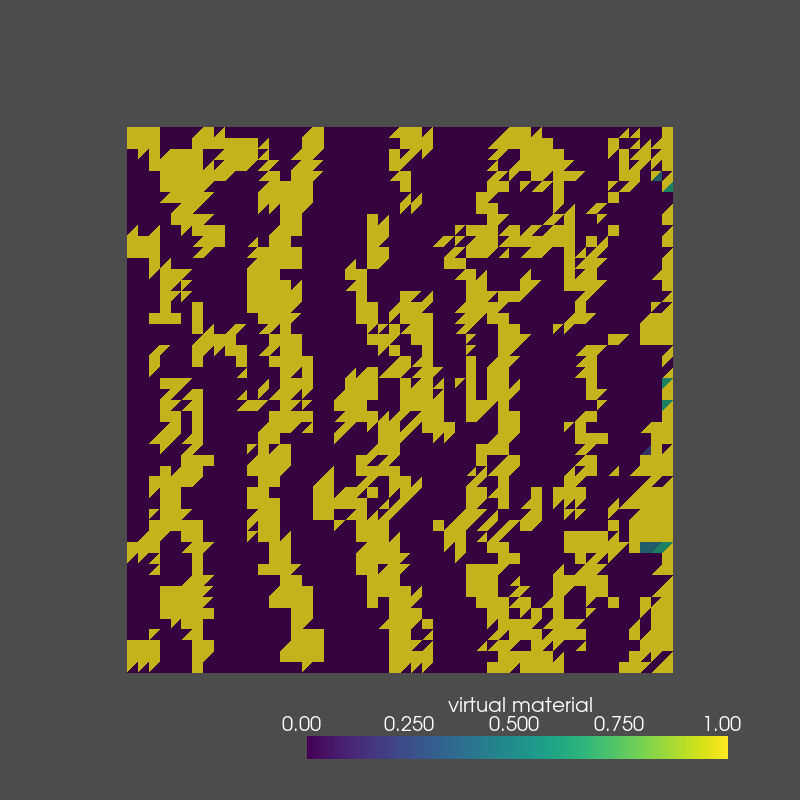

In [8]:
uh1, uh2 = uh.split()
mod_uh = fem.Function(Q)
mod_uh.interpolate(fem.Expression((uh1 + uh2) / 2, Q.element.interpolation_points()))
pyvista_plot(domain, mod_uh.x.array.real, 'uh1')
pyvista_plot(domain, mod_uh.x.array.imag, 'uh2')
matplotlib_plot(uh, '3d', ['uh1', 'uh2'])
pyvista_plot(domain, p.x.array.real, 'pressure real')
pyvista_plot(domain, p.x.array.imag, 'pressure imag')
matplotlib_plot(p, '3d', [r'pressure $real$', r'pressure $imag$'])
pyvista_plot(domain, vm.x.array.real, 'virtual material')